In [43]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,7)
plt.rc("font", size=14)
from scipy.stats import chi2, chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn import svm
from sklearn import svm
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('Downloads/Wine.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.shape

(178, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [7]:
# as we can see there are no null vlaues in the dataset, so we will move ahead with the data preprocessing


In [8]:
df.Customer_Segment.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [9]:
##question 1
## Compute and plot those feature which are related to each other?


In [10]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


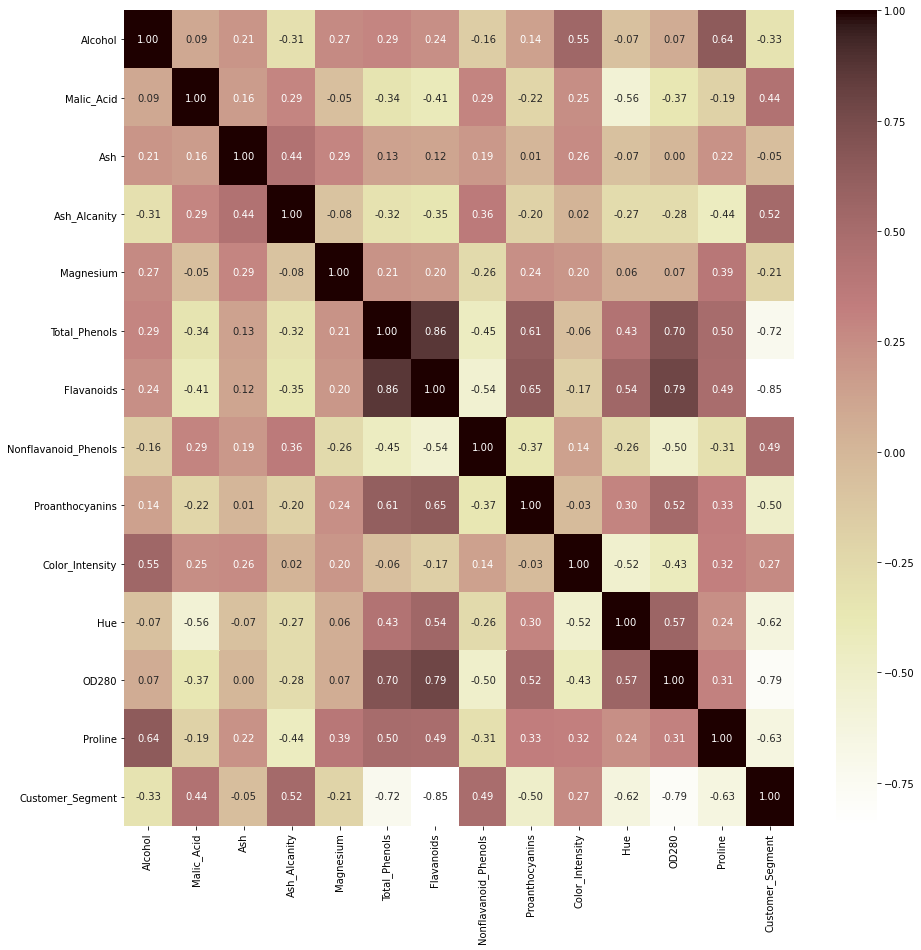

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot= True, fmt='.2f', cmap='pink_r')
plt.show()

In [17]:
## question 2

# What are the optimum number of principal components in PCA?

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_rescaled = scaler.fit_transform(df)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(df_rescaled)
red = pca.transform(df_rescaled)


array([[-3.5229339 , -1.45309844, -0.16479549, ...,  0.05563728,
        -0.45876506,  1.06556955],
       [-2.52885806,  0.33001925, -2.02670665, ...,  1.01037189,
         0.21880609, -0.02018203],
       [-2.78502898, -1.03693595,  0.9832377 , ..., -0.26895705,
         1.22276949, -0.10624913],
       ...,
       [ 3.02727243, -2.75604024, -0.94080304, ...,  0.05254455,
        -0.02788135, -0.21274935],
       [ 2.75522166, -2.29378408, -0.55047368, ...,  0.42651198,
         0.04878416,  0.47979317],
       [ 3.49633565, -2.76060799,  1.01315115, ..., -0.32500213,
        -0.7199834 ,  0.07990775]])

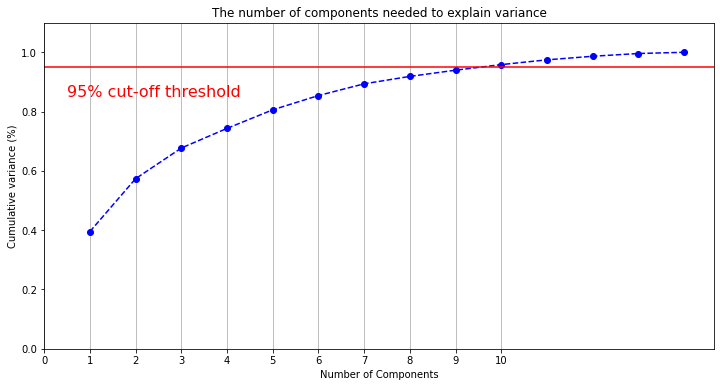

In [21]:
pca = PCA().fit(df_rescaled)

#% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 15, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [25]:
##question 3
# Build a KNN classifier considering optimal number of principal components and value of K and state its score.

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df1 = pd.read_csv("Downloads/Wine.csv")

In [57]:
X = red
y = df1.iloc[:,-1] 

In [35]:
featurescores

,Specs,Score
0,Alcohol,5.445499
1,Malic_Acid,28.068605
2,Ash,0.743381
3,Ash_Alcanity,29.383695
4,Magnesium,45.026381
5,Total_Phenols,15.623076
6,Flavanoids,63.334308
7,Nonflavanoid_Phenols,1.815485
8,Proanthocyanins,9.368283
9,Color_Intensity,109.016647


In [37]:
print(featurescores.nlargest(10,'Score'))

              Specs         Score
12          Proline  16540.067145
9   Color_Intensity    109.016647
6        Flavanoids     63.334308
4         Magnesium     45.026381
3      Ash_Alcanity     29.383695
1        Malic_Acid     28.068605
11            OD280     23.389883
5     Total_Phenols     15.623076
8   Proanthocyanins      9.368283
0           Alcohol      5.445499


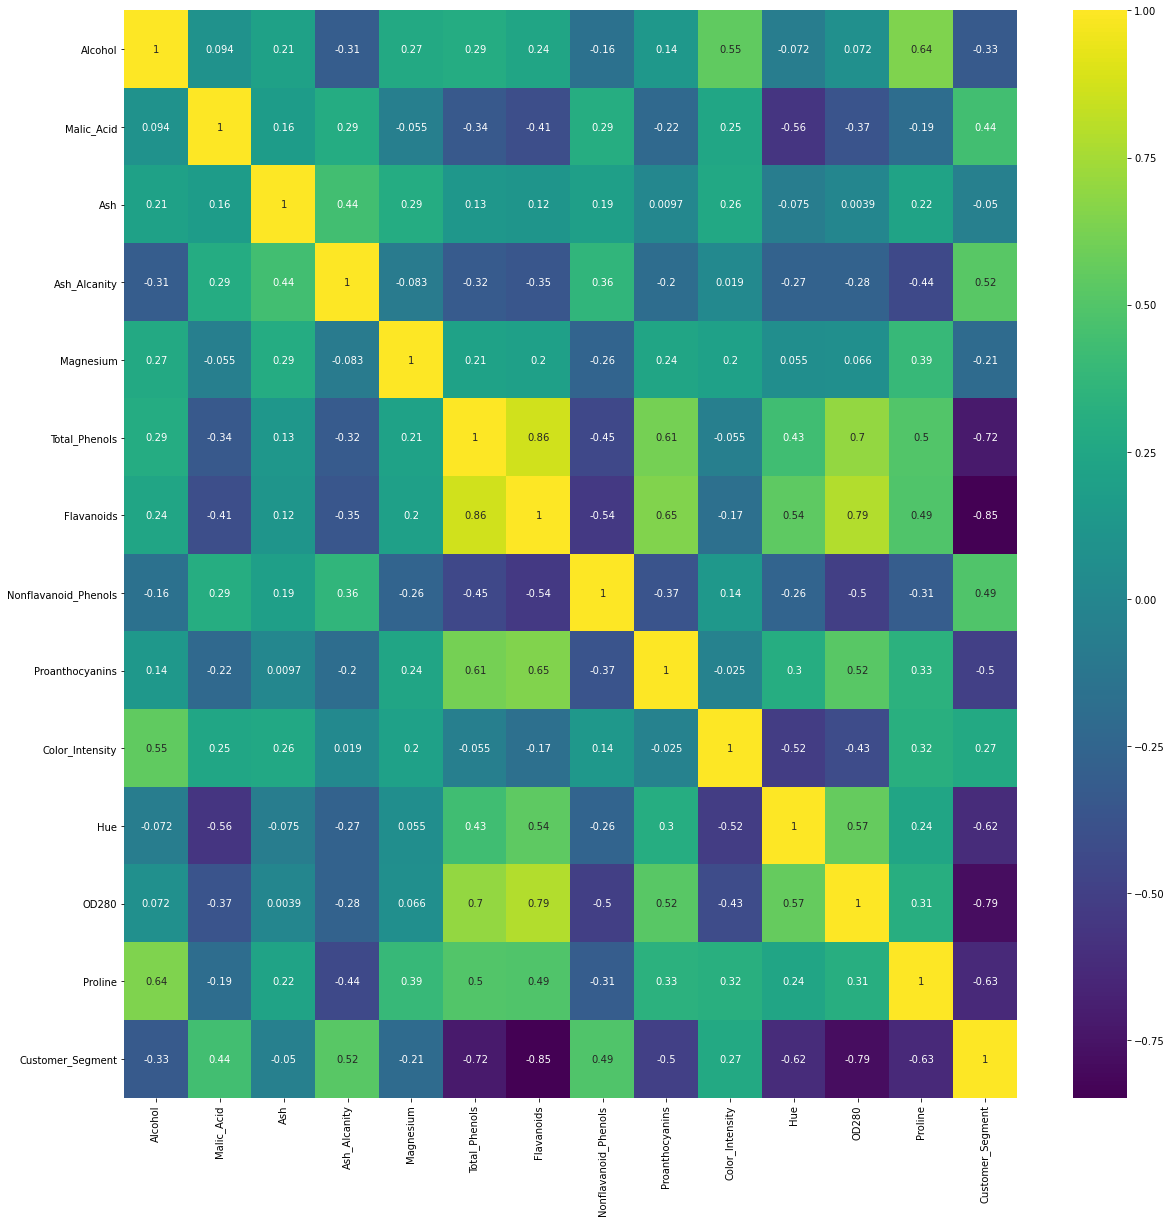

In [40]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="viridis")

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 1)

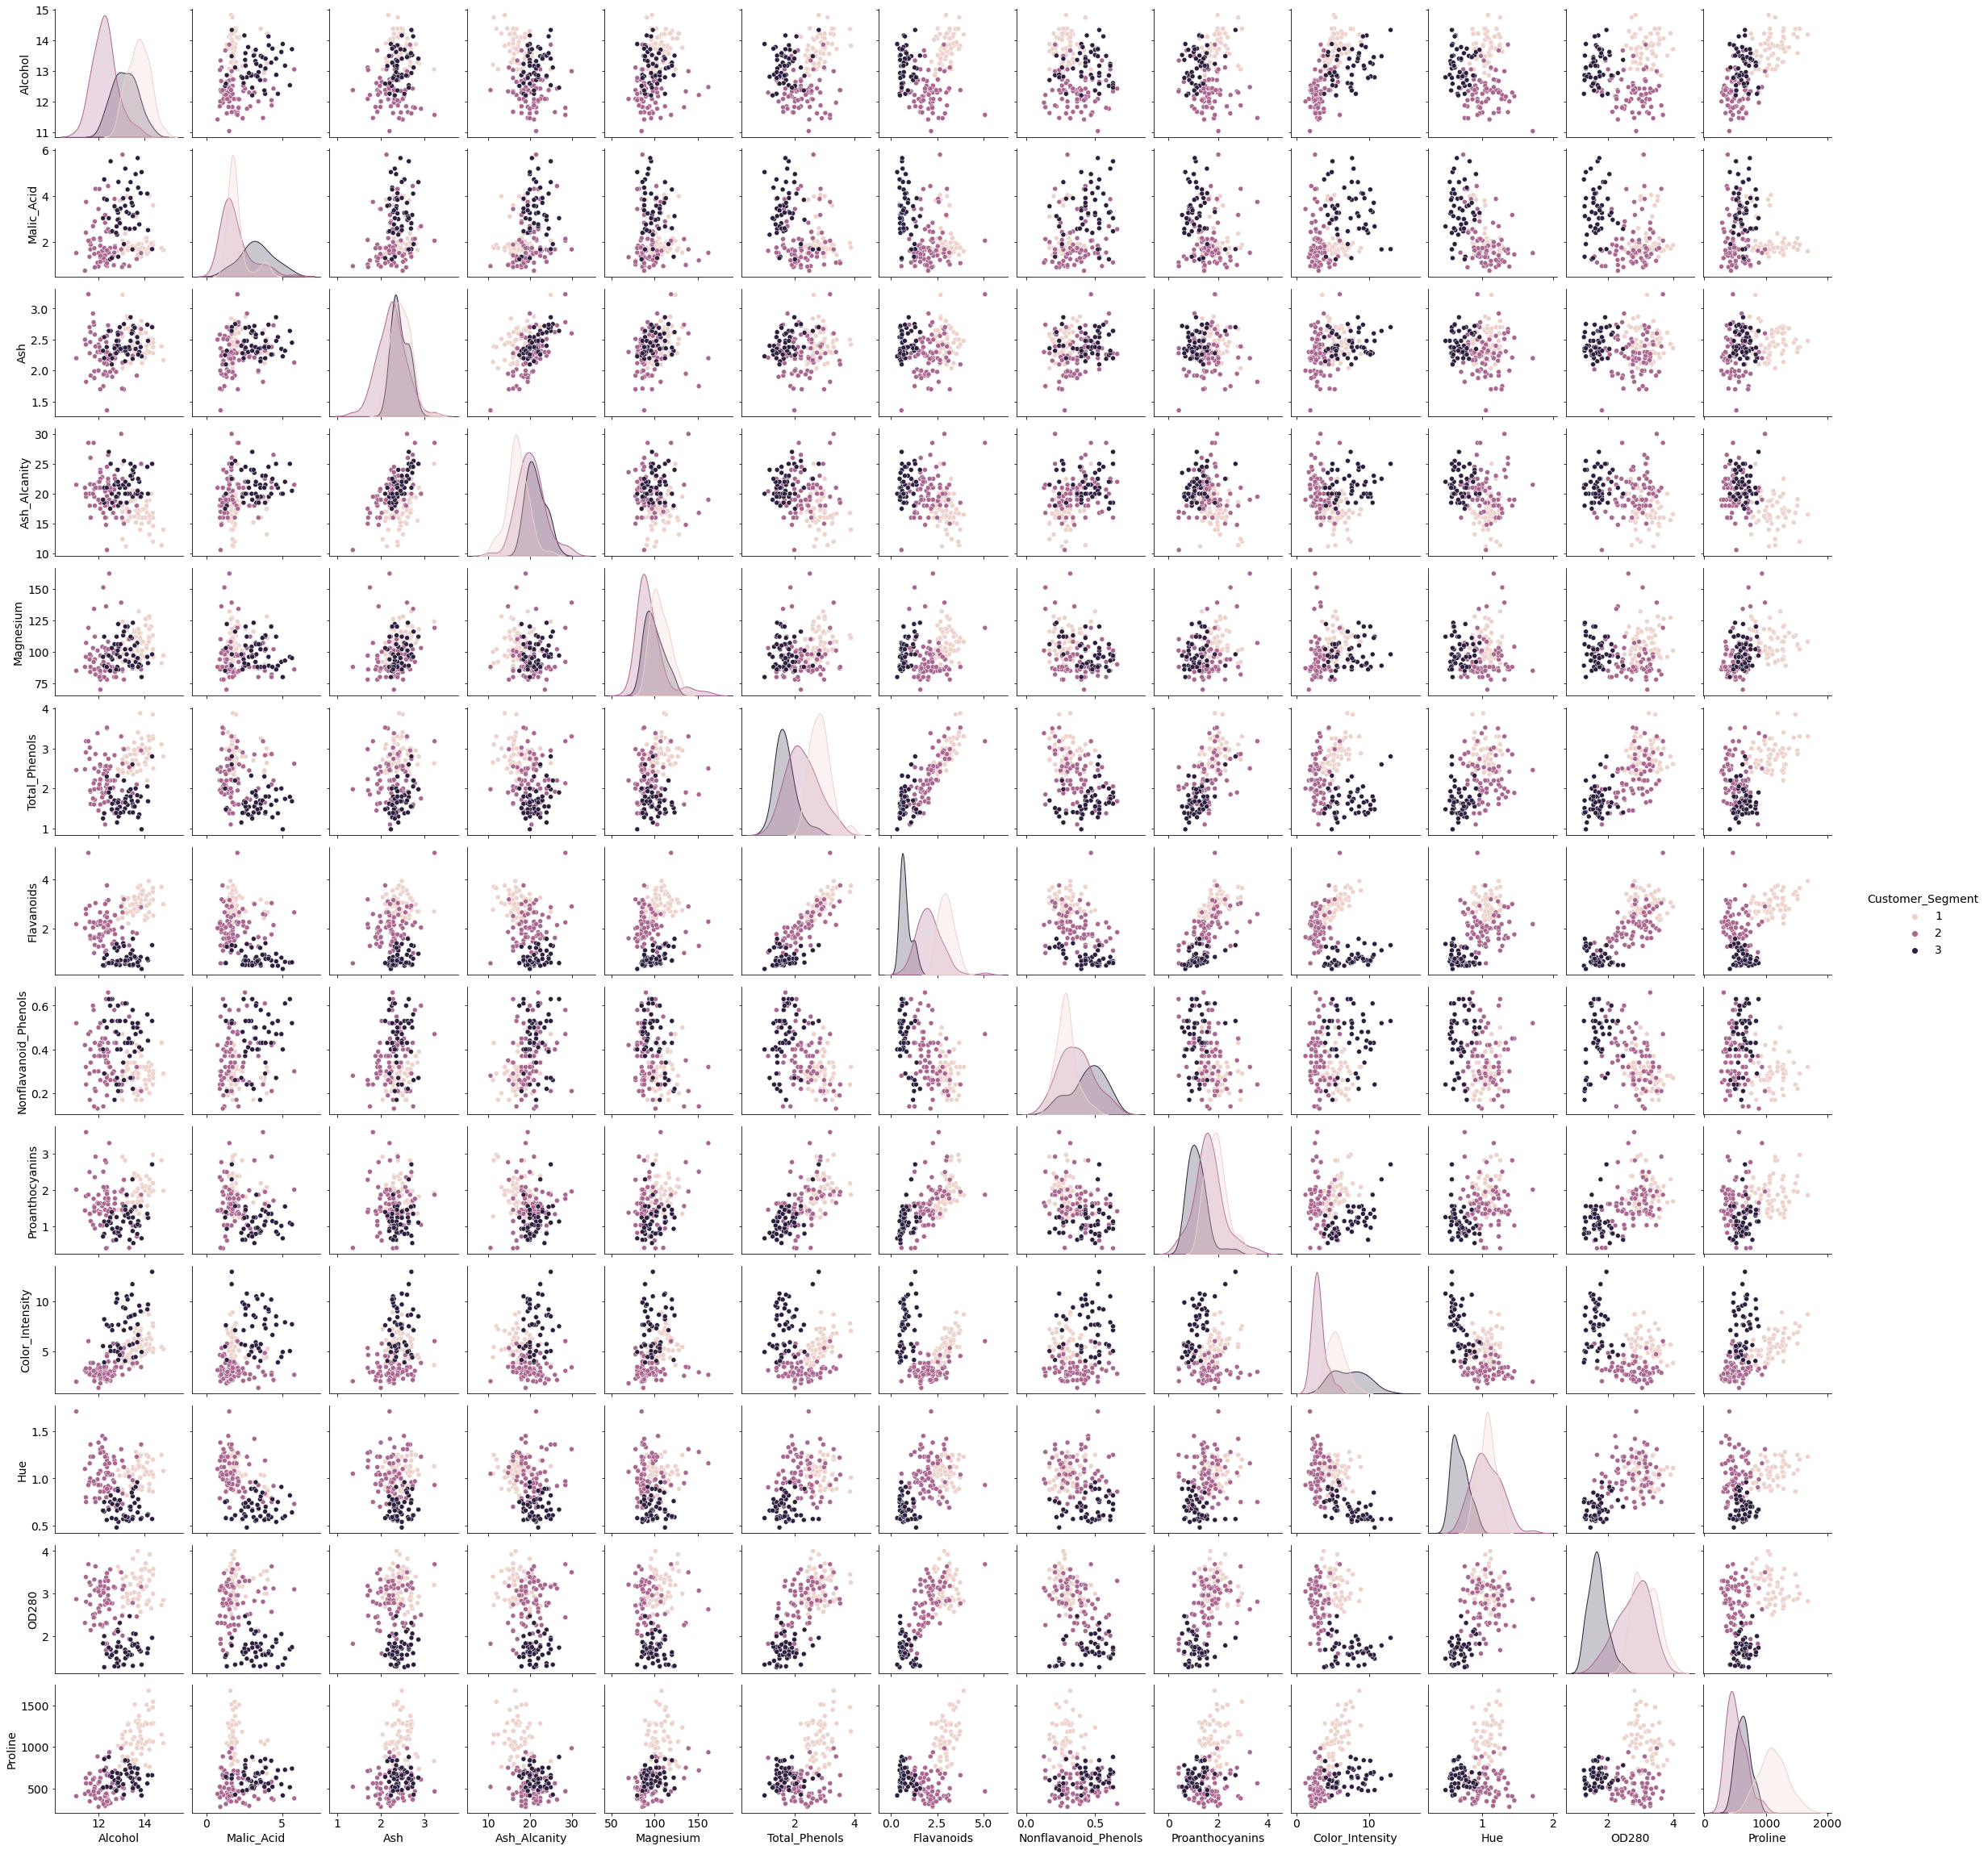

In [49]:
sns.pairplot(df1, hue='Customer_Segment')

KNeighborsClassifier(n_neighbors=1)
0.6805555555555556
KNeighborsClassifier(n_neighbors=2)
0.625
KNeighborsClassifier(n_neighbors=3)
0.6805555555555556
KNeighborsClassifier(n_neighbors=4)
0.625
KNeighborsClassifier()
0.6666666666666666
KNeighborsClassifier(n_neighbors=6)
0.6527777777777778
KNeighborsClassifier(n_neighbors=7)
0.6111111111111112
KNeighborsClassifier(n_neighbors=8)
0.6111111111111112
KNeighborsClassifier(n_neighbors=9)
0.6388888888888888
KNeighborsClassifier(n_neighbors=10)
0.6388888888888888
KNeighborsClassifier(n_neighbors=11)
0.6666666666666666
KNeighborsClassifier(n_neighbors=12)
0.6666666666666666
KNeighborsClassifier(n_neighbors=13)
0.6666666666666666
KNeighborsClassifier(n_neighbors=14)
0.6666666666666666
KNeighborsClassifier(n_neighbors=15)
0.6805555555555556
KNeighborsClassifier(n_neighbors=16)
0.7083333333333334
KNeighborsClassifier(n_neighbors=17)
0.7222222222222222
KNeighborsClassifier(n_neighbors=18)
0.6805555555555556
KNeighborsClassifier(n_neighbors=19)
0.6

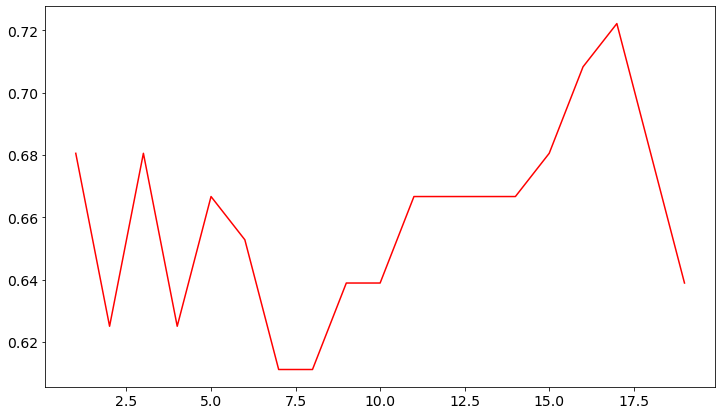

In [61]:
from sklearn.neighbors import KNeighborsClassifier
x=[]
y=np.arange(1,20)
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    #print(knn)
    df_knn=knn.fit(X_train,y_train)
    print(df_knn)
    Y_pred=df_knn.predict(X_test)
    
    print(df_knn.score(X_test,y_test))
    #x=df.append((df_knn.score(X_test,y_test)))
    #pd.crosstab(Y_test,y_pred,margins=True,rownames=['Actual'],colnames=['Predict'])
    from sklearn.metrics import classification_report
    #print(classification_report(Y_test,y_pred))
    
    x.append((df_knn.score(X_test,y_test)))   
plt.plot(y,x,color='r')



In [62]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn

KNeighborsClassifier(n_neighbors=17)

In [63]:
data_knn = knn.fit(X_train,y_train)
data_knn

KNeighborsClassifier(n_neighbors=17)

In [64]:
y_pred = data_knn.predict(X_test)
y_pred

array([3, 2, 3, 3, 1, 3, 3, 1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2,
       3, 1, 3, 3, 1, 1, 1, 3, 2, 3, 2, 1, 3, 2, 2, 2, 2, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 3, 2, 2, 1, 3, 3, 3, 1,
       2, 1, 2, 3, 2, 3], dtype=int64)

In [65]:
data_knn.score(X_test, y_test)

0.7222222222222222

In [66]:
accuracy_score(y_test, y_pred)

0.7222222222222222

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.79      0.85        28
           2       0.78      0.67      0.72        27
           3       0.48      0.71      0.57        17

    accuracy                           0.72        72
   macro avg       0.73      0.72      0.71        72
weighted avg       0.76      0.72      0.73        72



In [68]:
svcT = svm.SVC(kernel = 'linear',C=1, gamma = 'auto',probability = True).fit(X_train, y_train)

In [69]:
y_pred = svcT.predict(X_test)

In [70]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        28
           2       0.96      0.93      0.94        27
           3       1.00      0.94      0.97        17

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



In [72]:
preds1 = svcT.predict_proba(X_test)[:,1]

In [73]:
metrics.accuracy_score(y_test,y_pred)*100

95.83333333333334

In [74]:
## question 5
# Build a Naive Bayes Classifier and comment about its accuracy.


In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

In [77]:
y_pred

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1,
       1, 1, 2, 1, 1, 1, 2, 3, 3, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3, 1,
       2, 1, 2, 1, 3, 3], dtype=int64)

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[28,  0,  0],
       [ 1, 26,  0],
       [ 0,  0, 17]], dtype=int64)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      0.96      0.98        27
           3       1.00      1.00      1.00        17

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72

